In [218]:
# Import dati dalla prof
from scipy.io import loadmat
import numpy as np
import scipy.linalg as spl
import RisolviSis as RS
import matplotlib.pyplot as plt
dati = loadmat('testF.mat')
A1 = dati["A"]
b1 = dati["b"]


# Equazioni Normali

In [219]:
# Se la matrice A ha rango massimo ed è ben condizionata.
def eqnorm(A, b):

    G = A.T @ A

    print("Indice di condizionamento di G ", np.linalg.cond(G))
    f = A.T @ b
    L = spl.cholesky(G, lower=True)

    y, flag = RS.Lsolve(L, f)

    if flag == 0:
        x, flag = RS.Usolve(L.T, y)

    return x


# QRLS

In [220]:
# Se A ha rango massimo ed è mediamente mal condizionata.
def qrLS(A, b):
    n = A.shape[1]
    Q, R = spl.qr(A)

    # Risolvo il sistema triangolare superiore: prime n righe e tutte le colonne
    # per avere una matrice quadrata
    h = Q.T @ b
    x, flag = RS.Usolve(R[0:n, :], h[0:n])
    residuo = np.linalg.norm(h[n:])**2

    return x, residuo


# SVDLS

In [221]:
# Se A non ha rango massimo.
def SVDLS(A, b):
    n = A.shape[1]  # numero di colonne di A
    m = A.shape[0]  # numero di righe
    # Attenzione : Restituisce U, Sigma e VT=VTrasposta)
    U, s, VT = spl.svd(A)
    V = VT.T
    # Calcolo del rango della matrice, numero dei valori singolari maggiori di una soglia
    thresh = np.spacing(1) * m * s[0]
    k = np.count_nonzero(s > thresh)

    print("Rango: ", k)
    if (k < n):
        print("La matrice non è a rango massimo")
    else:
        print("La matrice è a rango massimo")

    d = U.T@b
    d1 = d[:k].reshape(k, 1)
    s1 = s[:k].reshape(k, 1)
    # Risolve il sistema diagonale di dimensione kxk avene come matrice dei coefficienti la matrice Sigma
    c = d1/s1
    x = V[:, :k] @ c
    residuo = np.linalg.norm(d[k:])**2
    return x, residuo


In [222]:

sol, residuo = SVDLS(A1, b1)
print("Soluzione nel senso dei minimi quadrati:\n  ", sol)
print("Residuo: ", residuo)
print("Norma soluzione: ", np.linalg.norm(sol))

# Di quanto ci discostiamo dalla soluzione esatta?
x_esatta = np.ones_like(sol)
err = np.linalg.norm(sol - x_esatta) / np.linalg.norm(x_esatta)
print("Errore soluzione SVDLS: ", err * 100)


Rango:  15
La matrice non è a rango massimo
Soluzione nel senso dei minimi quadrati:
   [[ 8.93308674e-01]
 [ 5.99593662e-02]
 [-1.00818890e-04]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.08594726e+00]
 [ 1.16319260e+00]
 [ 9.47694272e-01]
 [ 9.09857191e-01]]
Residuo:  8.36982653034658e-27
Norma soluzione:  4.130358162106173
Errore soluzione SVDLS:  31.955079101458395


# Approssimazione ai minimi quadrati

Rango:  3
La matrice è a rango massimo
Residuo:  0.06766884146211058


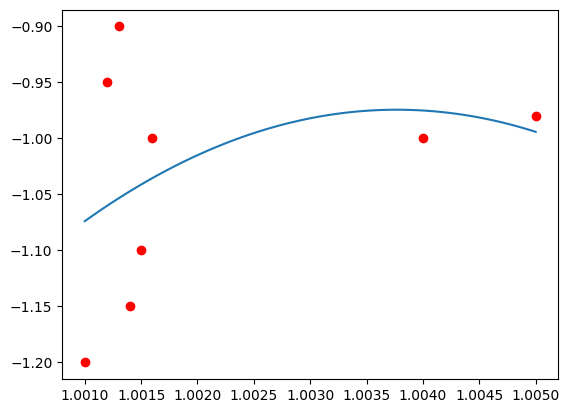

Errore:  0.06766884146655766


In [223]:
# Dati due vettori di dati, cerco di capire come meglio le funzioni
# possano essere usate per l'approssimazione ai minimi quadrati
x = np.array([1.001, 1.004, 1.005, 1.0012,
                1.0013,   1.0014,   1.0015,  1.0016])
y = np.array([-1.2, -1.0, -0.98, -0.95, 
                -0.9, -1.15, -1.1, -1])
m = x.shape[0]
n = 2  # grado del polinomio di regressione
n1 = n + 1  # gradi di libertà
A = np.vander(x, increasing=True)[:, :n1]
alpha, residuo = SVDLS(A, y)
#alpha = eqnorm(A, y)

print("Residuo: ", residuo)
xv = np.linspace(np.min(x), np.max(x), 100)
pol1 = np.polyval(np.flip(alpha), xv)
plt.plot(xv, pol1, x, y, 'ro')
plt.show()
errore = np.linalg.norm(y - np.polyval(np.flip(alpha), x))**2
print("Errore: ", errore)


# Retta di regressione

Condizionamento di A: 4.663457775986456
Indice di condizionamento di G  21.747838428408542


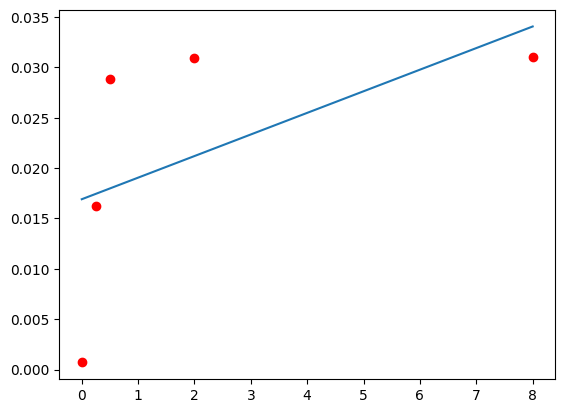

Errore:  0.0004848327762313228
Condizionamento di A:  65.67493525624785


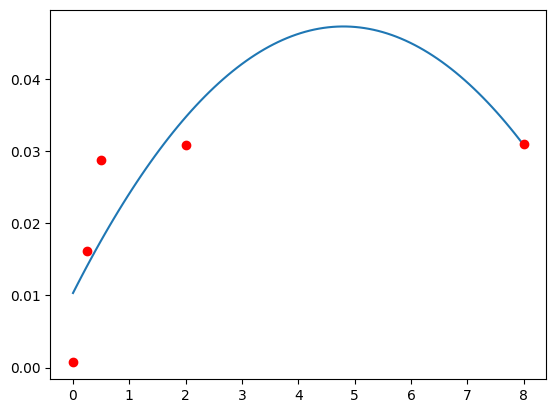

Residuo:  0.00023646355940249873
Condizionamento di A:  356547027314.2508
Indice di condizionamento di G  1.4095605216900414e+20
Errore eqn 0.0018066609384609072
Errore qr 0.0001793601626948677
Rango:  5
La matrice è a rango massimo
Errore svd 0.0001793602362690831


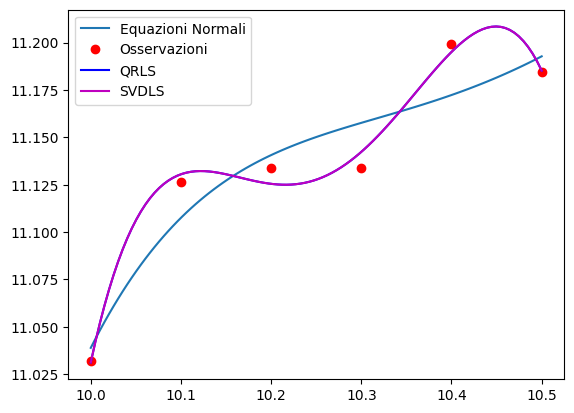

Condizionamento di A:  356547027314.2508
Indice di condizionamento di G  1.4095605216900414e+20
Errore eqn 0.0018066609384609072
Errore qr 0.0001793601626948677
Rango:  5
La matrice è a rango massimo
Errore svd 0.0001793602362690831


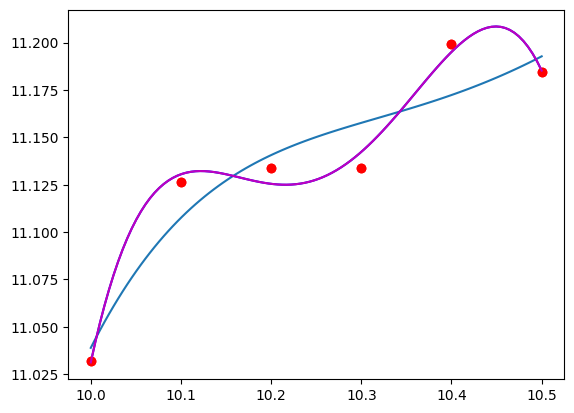

In [224]:
x = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013])
y = np.array([0.0007, 0.0162, 0.0288, 0.0309, 0.0310])
m = x.shape[0]
n = 1  # retta di regressione: grado 1
n1 = n+1  # gradi di libertà
A = np.vander(x, increasing=True)[:, :n1]
condA = np.linalg.cond(A)
print("Condizionamento di A:", condA)
# Poichè la matrice A è ben condizionata uso il metodo delle equazioni normali,
# la matrice G=A.T@A avrà un indice di condizionamento K(A)^2 contenuto
alpha2 = eqnorm(A, y)
xv = np.linspace(np.min(x), np.max(x), 100)
pol2 = np.polyval(np.flip(alpha2), xv)
plt.plot(xv, pol2, x, y, 'ro')
plt.show()
errore = np.linalg.norm(y - np.polyval(np.flip(alpha2), x))**2
print("Errore: ", errore)

n = 2  # parabola di regressione: grado 2
n1 = n + 1  # gradi di libertà
A = np.vander(x, increasing=True)[:, :n1]
condA = np.linalg.cond(A)
print("Condizionamento di A: ", condA)
# Poichè la matrice è mediamente ben condizionata (Ha un indice di condizionamento pari a  65.67493525624782
# (quinfi A.T@A avrà indice di condizionamento pari al quadrato dell'indice di condionamento di A)
# è quindi preferibile usare il metodo QR
alpha2, residuo = qrLS(A, y)
xv = np.linspace(np.min(x), np.max(x), 100)
pol2 = np.polyval(np.flip(alpha2), xv)
plt.plot(xv, pol2, x, y, 'ro')
plt.show()
print("Residuo: ", residuo)


x = np.arange(10, 10.6, 0.5/5)
y = np.array([11.0320, 11.1263, 11.1339, 11.1339, 11.1993, 11.1844])
n = 4  # grado del polinomio di regressione: 4
n1 = n + 1  # gradi di libertà
A = np.vander(x, increasing=True)[:, :n1]
condA = np.linalg.cond(A)
print("Condizionamento di A: ", condA)

alpha3_eqn = eqnorm(A, y)
xv = np.linspace(np.min(x), np.max(x), 100)
pol3_eqn = np.polyval(np.flip(alpha3_eqn), xv)
plt.plot(xv, pol3_eqn, x, y, 'ro')
errore_eqn = np.linalg.norm(y - np.polyval(np.flip(alpha3_eqn), x))**2
print("Errore eqn", errore_eqn)

alpha3_qr, residuo_qr = qrLS(A, y)
pol3_qr = np.polyval(np.flip(alpha3_qr), xv)
plt.plot(xv, pol3_qr, 'b')
print("Errore qr", residuo_qr)

alpha3_svd, residuo_svd = SVDLS(A, y)
pol3_svd = np.polyval(np.flip(alpha3_svd), xv)
print("Errore svd", residuo_svd)
plt.plot(xv, pol3_svd, 'm')

# A causa dell'elevato mal condizionamento di G il metodo delle
# equazioni normali non approssima i dati in maniera accurata
# (errore maggiore rispetto agli altri due metodi, che forniscono
# la stess accuratezza (grafici sovrapposti))
plt.legend(['Equazioni Normali', 'Osservazioni', 'QRLS', 'SVDLS'])
plt.show()

# E se applico delle perturbazioni?
# Ricalcolo il polimonio di grado 4 a partire da dati perturbati come richiesto dall'esercizio
xp = x.copy()
#xp[1] = xp[1] + 0.013
yp = y.copy()
#yp[1] = yp[1] - 0.001

n = 4  # grado del polinomio di regressione: 4
n1 = n + 1  # gradi di libertà
A = np.vander(xp, increasing=True)[:, :n1]
condA = np.linalg.cond(A)
print("Condizionamento di A: ", condA)

alpha3_eqn = eqnorm(A, yp)
xv = np.linspace(np.min(x), np.max(x), 100)
pol3_eqn = np.polyval(np.flip(alpha3_eqn), xv)
plt.plot(xv, pol3_eqn, x, y, 'ro')
errore_eqn = np.linalg.norm(y - np.polyval(np.flip(alpha3_eqn), x))**2
print("Errore eqn", errore_eqn)

alpha3_qr, residuo_qr = qrLS(A, yp)
pol3_qr = np.polyval(np.flip(alpha3_qr), xv)
plt.plot(xv, pol3_qr, 'b', xp, yp, 'ro')
print("Errore qr", residuo_qr)

alpha3_svd, residuo_svd = SVDLS(A, y)
pol3_svd = np.polyval(np.flip(alpha3_svd), xv)
print("Errore svd", residuo_svd)
plt.plot(xv, pol3_svd, 'm')
